Oke jadi di tahap awal ini, kita harus nyari dataset dulu ya buat dieksplorasinya. Nah kriterianya gini:

1. **Dari Mana Datasetnya?**  
   Kita bisa ambil dari platform kayak *Kaggle*, *UCI ML Repository*, atau *Open Data* yang banyak betebaran di internet. Kalau mau yang lebih personal, bisa juga pake data yang kita kumpulin sendiri sih.

**Sumber Dataset**: [Kaggle - Predictive Maintenance Oil and Gas Pipeline](https://www.kaggle.com/datasets/muhammadwaqas023/predictive-maintenance-oil-and-gas-pipeline-data/data)

**Apa Aja yang Ada di Dataset Ini?**  
Setiap baris di dataset ini mewakili satu segmen pipa dengan informasi berikut:

- **Pipe Size**: Diameter pipanya (dalam mm)
- **Thickness**: Ketebalan dinding pipa yang diukur
- **Material**: Jenis material pipanya (misalnya baja, komposit)
- **Maximum Pressure**: Tekanan puncak yang dialami pipa (dalam psi)
- **Temperature**: Suhu fluida di dalam pipa (dalam °C)
- **Corrosion Impact Percentage**: Estimasi tingkat korosi (%)
- **Thickness Loss**: Kehilangan ketebalan akibat aus atau korosi
- **Material Loss Percentage**: Persentase kehilangan material secara keseluruhan
- **Year Times**: Umur atau lama pipa sudah beroperasi (dalam tahun)
- **Conditions**: Kategori kondisi operasional (Normal, Moderate, Critical)

# **2. Import Library yang Diperlukan**

Di bagian ini kita bakal ngimport berbagai library Python yang diperluin buat analisis data dan pembuatan model machine learning. Gampangnya, ini kayak nyiapin semua alat sebelum mulai kerja.

In [44]:
# Library utama buat ngolah data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Library pembantu lainnya
import os
import re
# Library buat preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Matiin warnings biar gak berisik
import warnings
warnings.filterwarnings('ignore')

# **3. Load Dataset**

Nah sekarang kita load datasetnya ke notebook. Kalau datanya dalam format CSV, tinggal pake pandas buat bacanya. Setelah di-load, kita cek beberapa baris pertama buat mastiin datanya udah masuk dengan bener.

Kalau datasetnya masih di Google Drive, jangan lupa hubungkan Drive-nya dulu ke Colab ya. Kalau datanya unstructured, tinggal disesuaiin aja sama format yang biasa dipake.

In [45]:
data = pd.read_csv("dataset_raw/market_pipe_thickness_loss_dataset.csv")
data.head()

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical


# **4. Exploratory Data Analysis (EDA)**

Di sini kita bakal ngeksplor dataset buat dapetin insight atau pemahaman awal tentang karakteristik datanya.

Intinya, tahap EDA ini penting banget buat ngerti pola data sebelum kita masuk ke modeling. Jadi kita bisa tau mana yang perlu di-handle lebih lanjut.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


Oke jadi dari output di atas, kita punya 1000 baris data dengan 8 kolom bertipe angka (float & int) dan 3 kolom bertipe teks (object).

In [47]:
# Pisahin fitur numerik
num_feature = data.select_dtypes(include=['number'])

# Pisahin fitur kategoris
cat_feature = data.select_dtypes(include=['object'])

# Cek fitur apa aja
print(f"Fitur numerik = {num_feature.columns.tolist()}")
print(f"Fitur kategoris = {cat_feature.columns.tolist()}")

Fitur numerik = ['Pipe_Size_mm', 'Thickness_mm', 'Max_Pressure_psi', 'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm', 'Material_Loss_Percent', 'Time_Years']
Fitur kategoris = ['Material', 'Grade', 'Condition']


In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pipe_Size_mm,1000.0,522.00000,443.703587,50.00,150.0000,300.000,800.0000,1500.00
Thickness_mm,1000.0,16.07353,10.548358,3.00,7.3575,12.930,23.0275,49.53
Max_Pressure_psi,1000.0,1004.10000,812.843099,150.00,300.0000,900.000,1500.0000,2500.00
Temperature_C,1000.0,42.59560,41.127071,-50.00,13.4000,41.200,69.1500,149.70
Corrosion_Impact_Percent,1000.0,9.74599,5.817492,0.00,4.4925,9.720,14.8325,20.00
Thickness_Loss_mm,1000.0,4.88630,2.901123,0.01,2.3650,4.915,7.4325,9.99
Material_Loss_Percent,1000.0,46.74756,46.602553,0.08,15.6650,31.660,61.0350,318.75
Time_Years,1000.0,12.96100,7.135993,1.00,7.0000,13.000,19.0000,25.00


In [49]:
data.describe(include='object').T

,count,unique,top,freq
Material,1000,5,Fiberglass,219
Grade,1000,5,ASTM A333 Grade 6,228
Condition,1000,3,Critical,487


Kalo dilihat secara statistik, kebanyakan data terkumpul di satu titik tertentu (nanti kita cek visualnya). Ada juga beberapa fitur yang nilai min dan max-nya lumayan jauh dari distribusi normalnya - tapi kayaknya masih wajar sih jadi gak perlu dihapus atau diubah-ubah.

In [50]:
# Cek nilai unik di fitur kategoris
for col in cat_feature.columns:
    print(f"Nilai unik di kolom {col}: {cat_feature[col].unique()}")

Nilai unik di kolom Material: ['Carbon Steel' 'PVC' 'HDPE' 'Fiberglass' 'Stainless Steel']
Nilai unik di kolom Grade: ['ASTM A333 Grade 6' 'ASTM A106 Grade B' 'API 5L X52' 'API 5L X42'
 'API 5L X65']
Nilai unik di kolom Condition: ['Moderate' 'Critical' 'Normal']


In [51]:
# Cek missing value
data.isna().sum()

Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                       0
Max_Pressure_psi            0
Temperature_C               0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Condition                   0
dtype: int64

In [52]:
# Cek data duplikat
data.duplicated().sum()

np.int64(0)

Bagus! Datanya bersih banget, gak ada missing value dan gak ada duplikat. Jadi kita gak perlu ribet cleaning data lagi.

In [53]:
# Bikin fungsi buat ngeliat distribusi fitur
def plot_feature_distributions(data, feature_columns):
    """
    Nampilin histogram distribusi buat setiap fitur
    """
    n_cols = 4
    bins = 20
    num_vars = len(feature_columns)
    n_rows = -(-num_vars // n_cols)  # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, column in enumerate(feature_columns):
        data[column].hist(ax=axes[i], bins=bins, edgecolor='black')
        axes[i].set_title(f'Distribusi: {column}')
        axes[i].set_xlabel('Nilai')
        axes[i].set_ylabel('Frekuensi')
        for label in axes[i].get_xticklabels():
            label.set_rotation(45)
            
    # Hapus subplot kosong
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

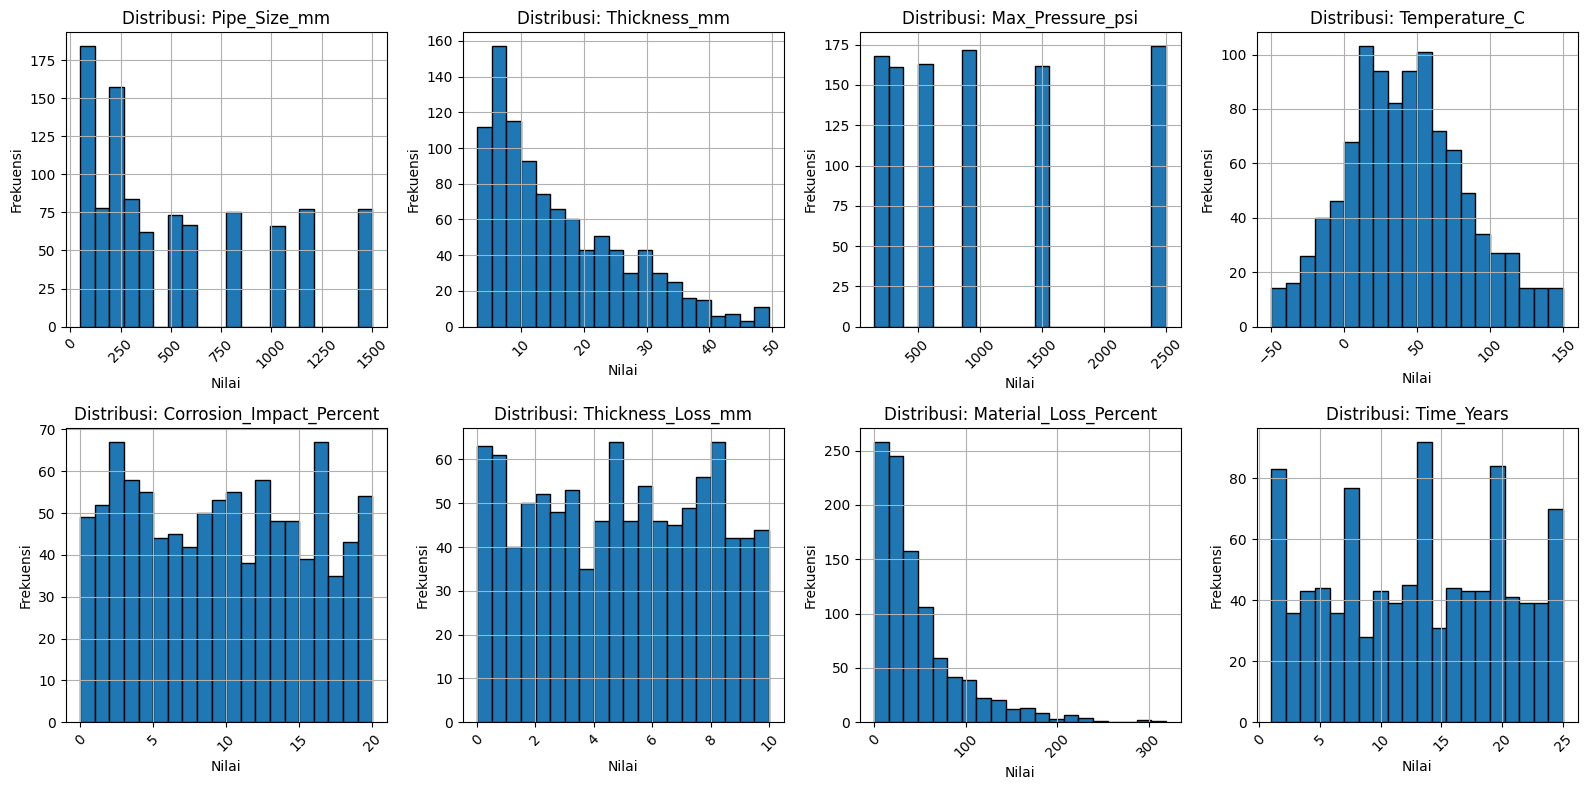

In [54]:
# Cek distribusi fitur numerik
plot_feature_distributions(data, num_feature.columns)

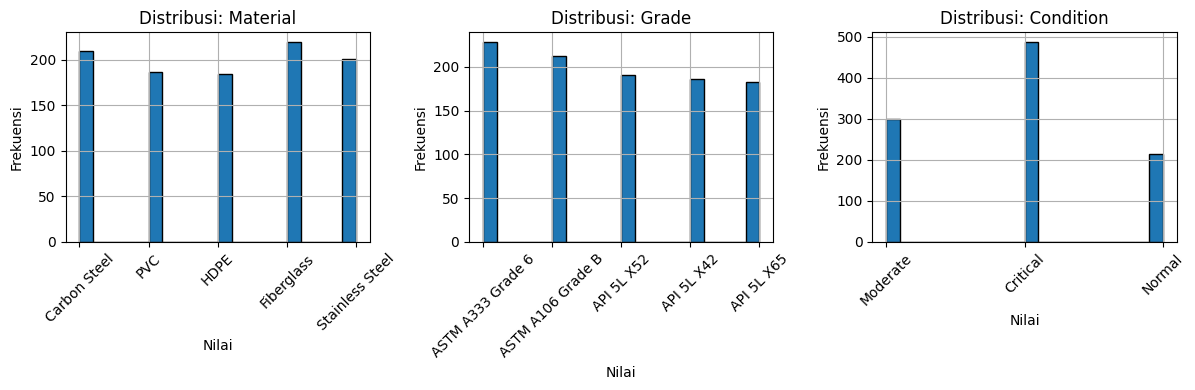

In [55]:
# Cek distribusi fitur kategoris
plot_feature_distributions(data, cat_feature.columns)

Dari visualisasi distribusi fitur numerik, sebagian besar udah oke. Tapi ada beberapa yang condong ke satu sisi (skewed) - ini bisa kita atasi nanti pake transformasi log biar distribusinya lebih normal. 

Untuk fitur kategoris, distribusinya memang gak seimbang tapi masih wajar lah. Target "Condition" kita dominan di kelas Critical, tapi gak terlalu parah. Kalau nanti model performanya kurang bagus, bisa dicoba pake teknik weighting atau sampling.

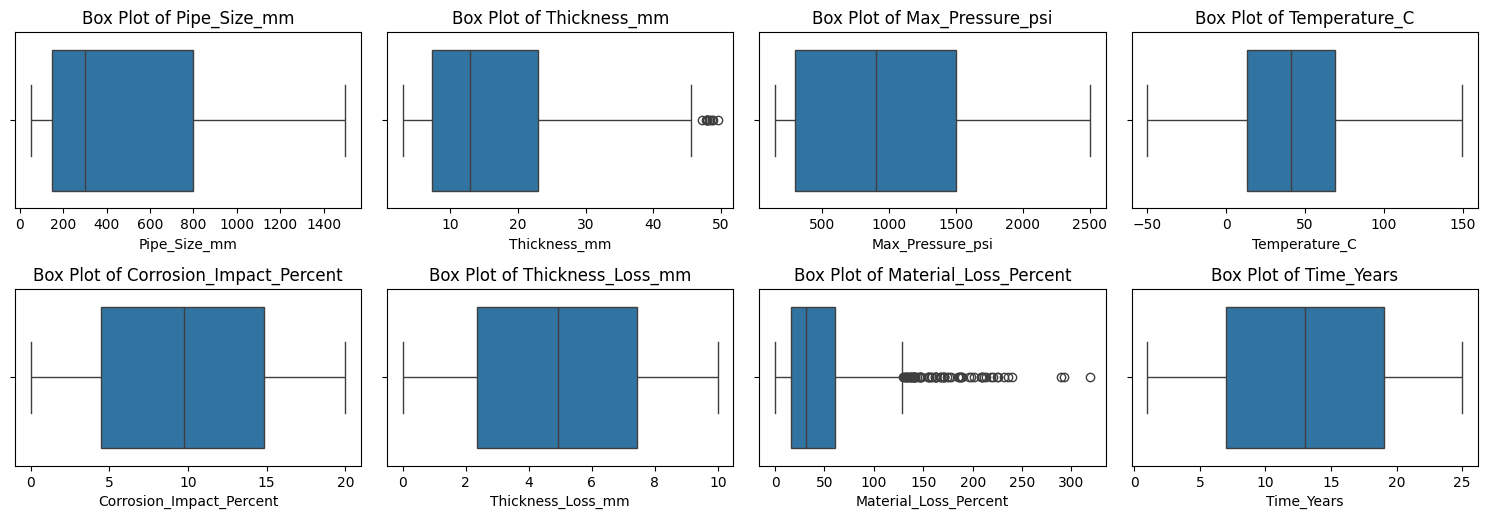

In [56]:
num_plots = len(num_feature)
n_cols, n_rows = 4, 4

# Bikin boxplot buat deteksi outlier
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, fitur in enumerate(num_feature):
    sns.boxplot(x=data[fitur], ax=axes[i])
    axes[i].set_title(f'Box Plot of {fitur}')
    axes[i].set_xlabel(fitur)

# Hapus subplot yang gak kepake
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [57]:
# Fungsi buat deteksi outlier pake IQR method
def deteksi_outliers(df, fitur):
    for col in fitur:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_prop = (outlier_count / len(df)) * 100

        print(f"Kolom {col}: Outliers = {outlier_count}, Proporsi = {outlier_prop:.2f}%")

deteksi_outliers(data, num_feature)

Kolom Pipe_Size_mm: Outliers = 0, Proporsi = 0.00%
Kolom Thickness_mm: Outliers = 11, Proporsi = 1.10%
Kolom Max_Pressure_psi: Outliers = 0, Proporsi = 0.00%
Kolom Temperature_C: Outliers = 0, Proporsi = 0.00%
Kolom Corrosion_Impact_Percent: Outliers = 0, Proporsi = 0.00%
Kolom Thickness_Loss_mm: Outliers = 0, Proporsi = 0.00%
Kolom Material_Loss_Percent: Outliers = 70, Proporsi = 7.00%
Kolom Time_Years: Outliers = 0, Proporsi = 0.00%


Dari boxplot dan deteksi IQR, keliatan ada beberapa data yang terdeteksi sebagai outlier - terutama di data yang skewed tadi. Tapi masih ringan kok, jadi kita gak perlu buang datanya. Nanti kita coba atasi pake transformasi aja.

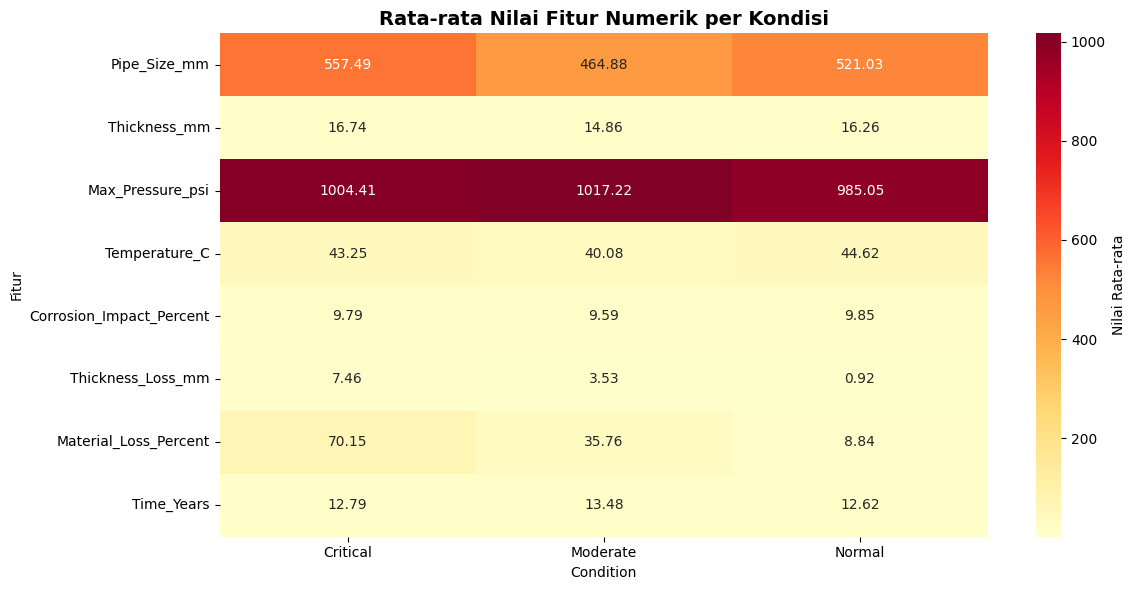


Rata-rata Fitur per Kondisi:
           Pipe_Size_mm  Thickness_mm  Max_Pressure_psi  Temperature_C  \
Condition                                                                
Critical         557.49         16.74           1004.41          43.25   
Moderate         464.88         14.86           1017.22          40.08   
Normal           521.03         16.26            985.05          44.62   

           Corrosion_Impact_Percent  Thickness_Loss_mm  Material_Loss_Percent  \
Condition                                                                       
Critical                       9.79               7.46                  70.15   
Moderate                       9.59               3.53                  35.76   
Normal                         9.85               0.92                   8.84   

           Time_Years  
Condition              
Critical        12.79  
Moderate        13.48  
Normal          12.62  


In [58]:
# Hitung rata-rata fitur per kondisi
mean_by_condition = data.groupby('Condition')[num_feature.columns].mean()

# Tampilkan sebagai heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(mean_by_condition.T, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Nilai Rata-rata'})
plt.title('Rata-rata Nilai Fitur Numerik per Kondisi', fontsize=14, fontweight='bold')
plt.xlabel('Condition')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

# Tampilkan dalam bentuk tabel juga
print("\nRata-rata Fitur per Kondisi:")
print("=" * 80)
print(mean_by_condition.round(2))

## Analisis Rata-rata Fitur per Kondisi

Mari kita liat rata-rata nilai setiap fitur untuk masing-masing kondisi. Ini bisa kasih insight menarik tentang karakteristik tiap kelas.

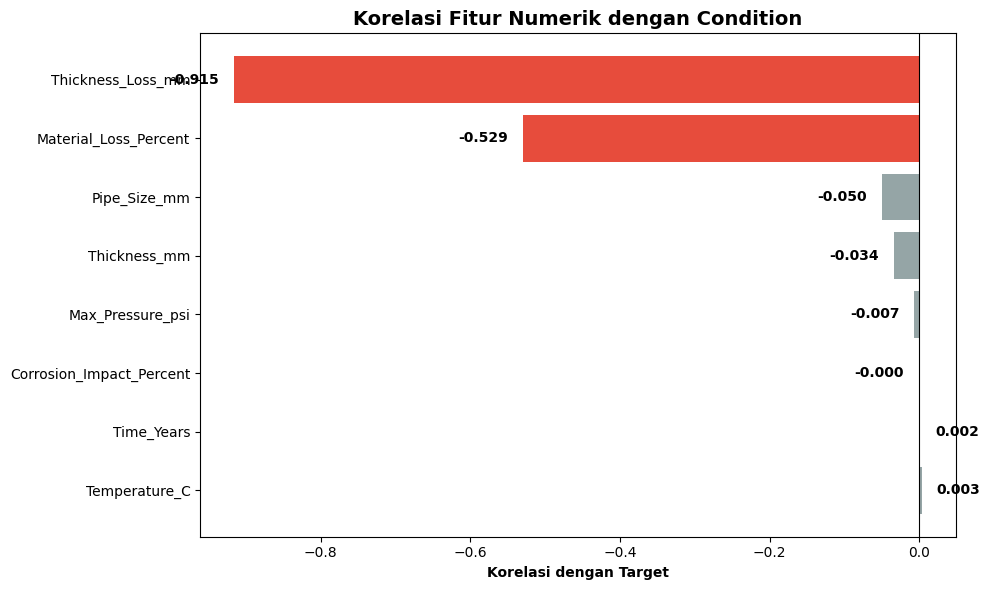


Korelasi Fitur dengan Target (diurutkan):
--------------------------------------------------
Temperature_C                 :  0.003
Time_Years                    :  0.002
Corrosion_Impact_Percent      : -0.000
Max_Pressure_psi              : -0.007
Thickness_mm                  : -0.034
Pipe_Size_mm                  : -0.050
Material_Loss_Percent         : -0.529
Thickness_Loss_mm             : -0.915


In [59]:
# Encode target sementara buat korelasi
from sklearn.preprocessing import LabelEncoder
le_temp = LabelEncoder()
data_temp = data.copy()
data_temp['Condition_encoded'] = le_temp.fit_transform(data_temp['Condition'])

# Hitung korelasi fitur numerik dengan target
correlations = data_temp[num_feature.columns.tolist() + ['Condition_encoded']].corr()['Condition_encoded'].drop('Condition_encoded')
correlations = correlations.sort_values(ascending=False)

# Visualisasi korelasi
plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if abs(x) > 0.5 else '#3498db' if abs(x) > 0.3 else '#95a5a6' for x in correlations.values]
bars = plt.barh(range(len(correlations)), correlations.values, color=colors)
plt.yticks(range(len(correlations)), correlations.index)
plt.xlabel('Korelasi dengan Target', fontweight='bold')
plt.title('Korelasi Fitur Numerik dengan Condition', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Tambahkan nilai di ujung bar
for i, (idx, val) in enumerate(correlations.items()):
    plt.text(val + 0.02 if val > 0 else val - 0.02, i, f'{val:.3f}', 
             va='center', ha='left' if val > 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKorelasi Fitur dengan Target (diurutkan):")
print("-" * 50)
for feat, corr in correlations.items():
    print(f"{feat:30s}: {corr:6.3f}")

## Analisis Korelasi dengan Target (Numerik)

Kita cek seberapa kuat korelasi setiap fitur numerik dengan target. Ini penting buat tau fitur mana yang paling berpengaruh.

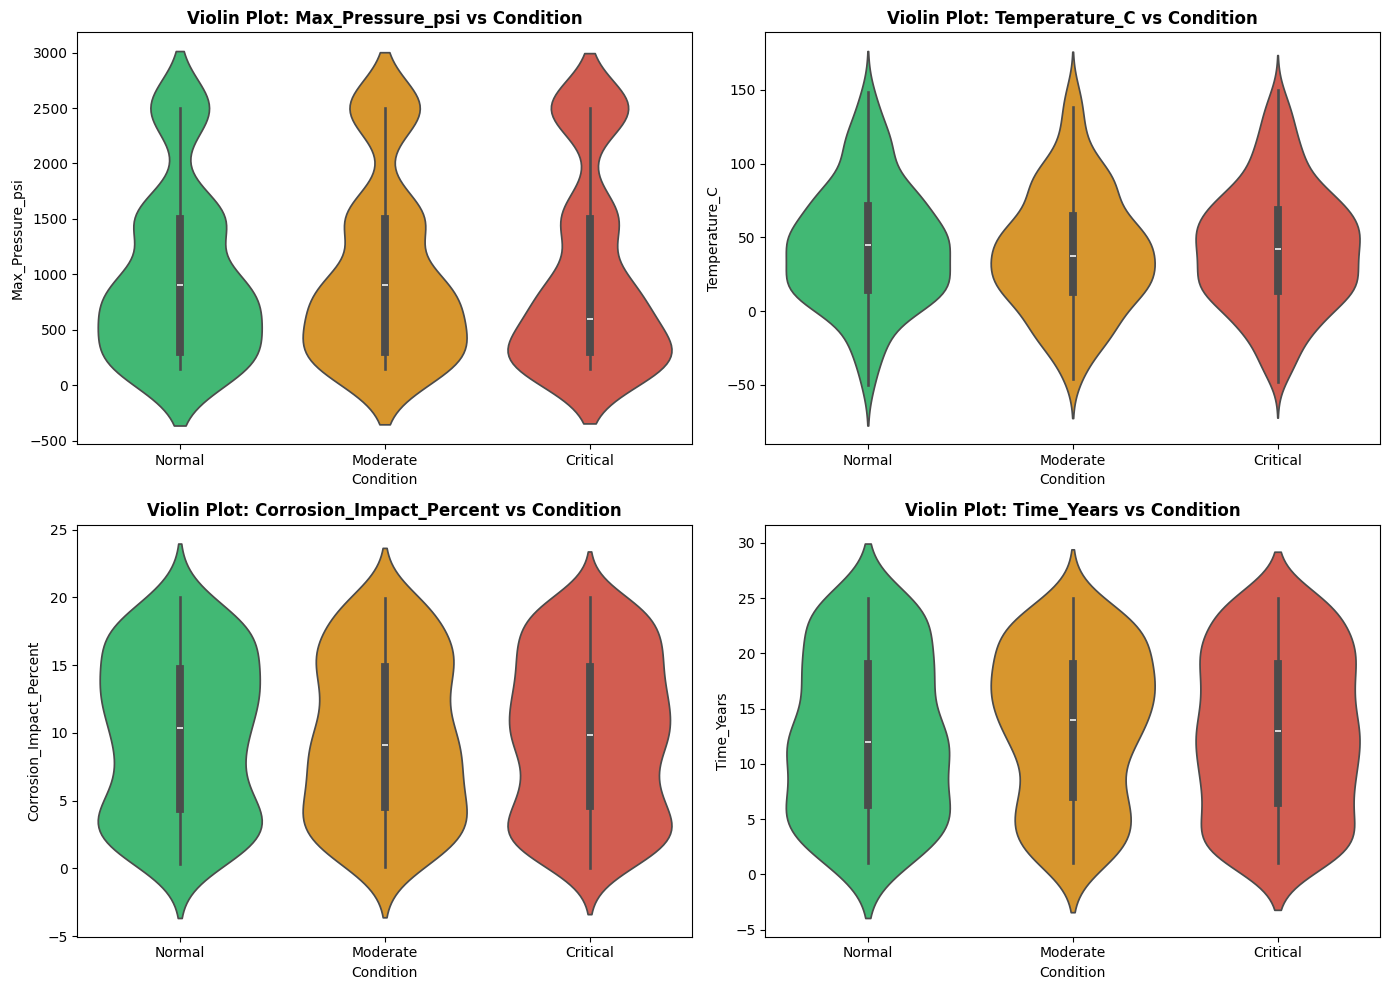

In [60]:
# Bikin violin plot buat fitur numerik penting vs target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

fitur_penting = ['Max_Pressure_psi', 'Temperature_C', 
                 'Corrosion_Impact_Percent', 'Time_Years']

for idx, col in enumerate(fitur_penting):
    sns.violinplot(x='Condition', y=col, data=data, ax=axes[idx],
                   order=['Normal', 'Moderate', 'Critical'],
                   palette={'Normal': '#2ecc71', 'Moderate': '#f39c12', 'Critical': '#e74c3c'})
    axes[idx].set_title(f'Violin Plot: {col} vs Condition', fontweight='bold')
    axes[idx].set_xlabel('Condition')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

## Analisis Violin Plot

Violin plot ini gabungan dari boxplot dan density plot. Jadi kita bisa liat distribusi dan outlier sekaligus dengan lebih detail.

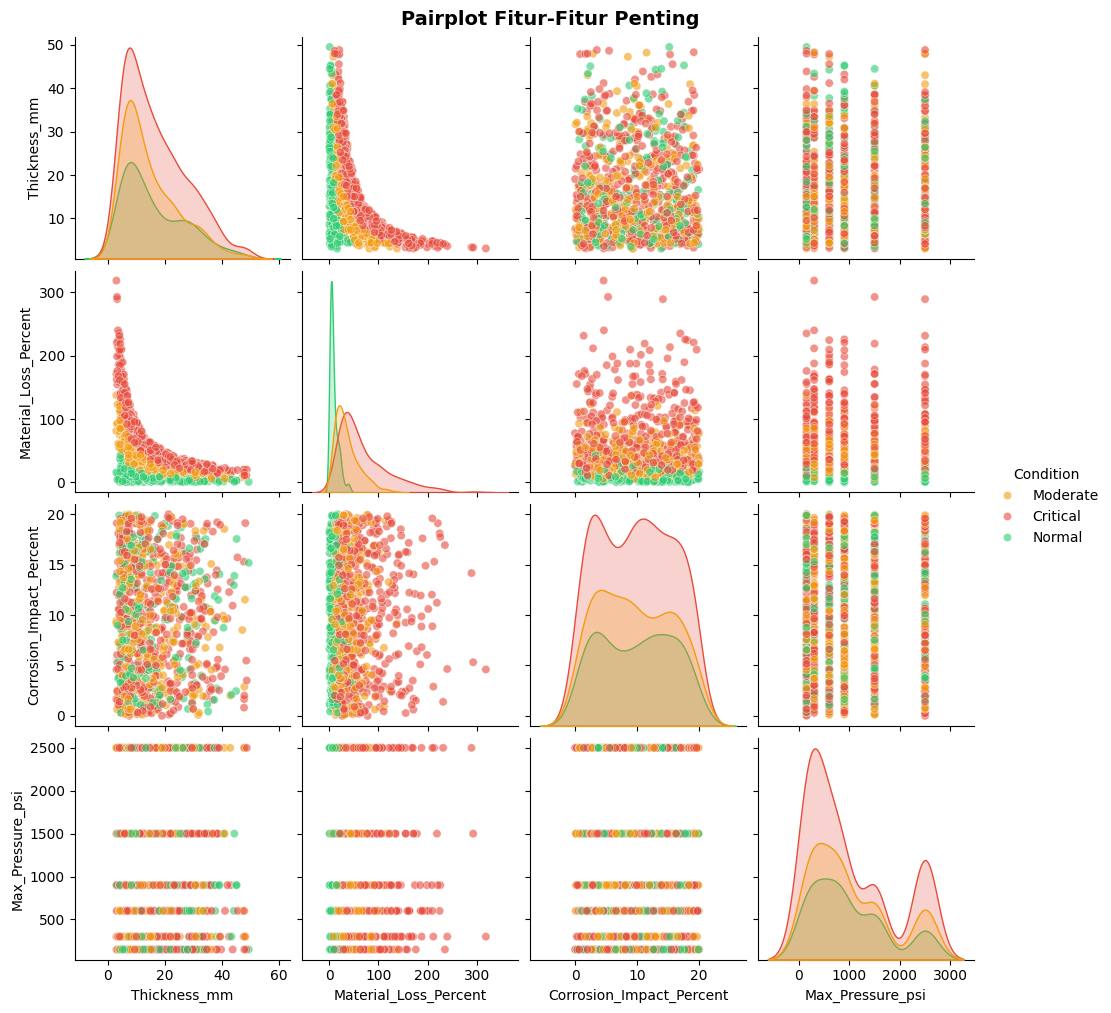

In [61]:
# Pilih beberapa fitur penting buat pairplot (biar gak terlalu ramai)
important_features = ['Thickness_mm', 'Material_Loss_Percent', 'Corrosion_Impact_Percent', 
                      'Max_Pressure_psi', 'Condition']

# Bikin pairplot
sns.pairplot(data[important_features], hue='Condition', 
             palette={'Normal': '#2ecc71', 'Moderate': '#f39c12', 'Critical': '#e74c3c'},
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot Fitur-Fitur Penting', y=1.01, fontsize=14, fontweight='bold')
plt.show()

## Analisis Pairplot untuk Fitur Penting

Sekarang kita liat hubungan antar fitur yang penting pake pairplot. Ini berguna buat ngeliat pattern atau cluster yang mungkin ada.

Distribusi Kelas Target:
----------------------------------------
Normal      :  214 data (21.40%)
Moderate    :  299 data (29.90%)
Critical    :  487 data (48.70%)


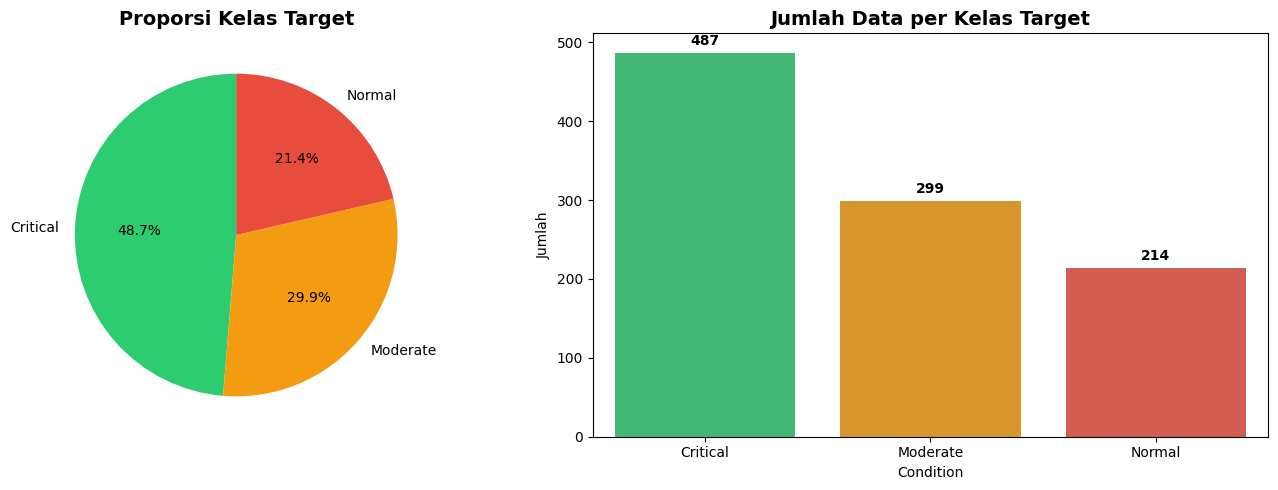

In [62]:
# Hitung distribusi target
target_counts = data['Condition'].value_counts()
target_percentages = data['Condition'].value_counts(normalize=True) * 100

print("Distribusi Kelas Target:")
print("-" * 40)
for condition in ['Normal', 'Moderate', 'Critical']:
    if condition in target_counts.index:
        count = target_counts[condition]
        pct = target_percentages[condition]
        print(f"{condition:12s}: {count:4d} data ({pct:.2f}%)")

# Visualisasi distribusi target dengan pie chart dan bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#2ecc71', '#f39c12', '#e74c3c']
ax1.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('Proporsi Kelas Target', fontsize=14, fontweight='bold')

# Bar chart
sns.barplot(x=target_counts.index, y=target_counts.values, palette=colors, ax=ax2)
ax2.set_title('Jumlah Data per Kelas Target', fontsize=14, fontweight='bold')
ax2.set_xlabel('Condition')
ax2.set_ylabel('Jumlah')
for i, v in enumerate(target_counts.values):
    ax2.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Analisis Distribusi Target

Kita perlu tau gimana distribusi kelas target kita, soalnya ini penting banget buat nentuin strategi training nanti.

In [63]:
# Cek skewness dan kurtosis tiap fitur numerik
print("Skewness dan Kurtosis untuk setiap fitur numerik:\n")
for col in num_feature.columns:
    skew_val = data[col].skew()
    kurt_val = data[col].kurtosis()
    print(f"{col}:")
    print(f"  Skewness: {skew_val:.3f} {'(cenderung kanan)' if skew_val > 0 else '(cenderung kiri)' if skew_val < 0 else '(simetris)'}")
    print(f"  Kurtosis: {kurt_val:.3f} {'(heavy-tailed)' if kurt_val > 0 else '(light-tailed)'}")
    print()

Skewness dan Kurtosis untuk setiap fitur numerik:

Pipe_Size_mm:
  Skewness: 0.910 (cenderung kanan)
  Kurtosis: -0.385 (light-tailed)

Thickness_mm:
  Skewness: 0.933 (cenderung kanan)
  Kurtosis: 0.104 (heavy-tailed)

Max_Pressure_psi:
  Skewness: 0.804 (cenderung kanan)
  Kurtosis: -0.669 (light-tailed)

Temperature_C:
  Skewness: 0.269 (cenderung kanan)
  Kurtosis: -0.259 (light-tailed)

Corrosion_Impact_Percent:
  Skewness: 0.054 (cenderung kanan)
  Kurtosis: -1.231 (light-tailed)

Thickness_Loss_mm:
  Skewness: -0.008 (cenderung kiri)
  Kurtosis: -1.217 (light-tailed)

Material_Loss_Percent:
  Skewness: 1.944 (cenderung kanan)
  Kurtosis: 4.649 (heavy-tailed)

Time_Years:
  Skewness: -0.022 (cenderung kiri)
  Kurtosis: -1.183 (light-tailed)



## Analisis Statistik Lebih Detail

Sekarang kita coba liat statistik yang lebih spesifik per fitur. Ini berguna buat ngerti sebaran data lebih dalam lagi.

In [64]:
# Bikin copy data buat keperluan EDA
data_EDA = data.copy()

# One-hot encoding buat fitur kategoris
onehot_material = pd.get_dummies(data_EDA['Material'], prefix='Material')
onehot_grade = pd.get_dummies(data_EDA['Grade'], prefix='Grade')

# Gabungin ke data EDA
data_EDA = pd.concat([data_EDA.drop(columns=['Material', 'Grade']), onehot_material, onehot_grade], axis=1)

# Ubah tipe data hasil encoding jadi integer
for col in onehot_material.columns:
    data_EDA[col] = data_EDA[col].astype(int)
for col in onehot_grade.columns:
    data_EDA[col] = data_EDA[col].astype(int)

data_EDA.head()

,Pipe_Size_mm,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Material_Carbon Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless Steel,Grade_API 5L X42,Grade_API 5L X52,Grade_API 5L X65,Grade_ASTM A106 Grade B,Grade_ASTM A333 Grade 6
0,800,15.48,300,84.9,16.04,4.91,31.72,2,Moderate,1,0,0,0,0,0,0,0,0,1
1,800,22.00,150,14.1,7.38,7.32,33.27,4,Critical,0,0,0,1,0,0,0,0,1,0
2,400,12.05,2500,0.6,2.12,6.32,52.45,7,Critical,1,0,0,0,0,0,1,0,0,0
3,1500,38.72,1500,52.7,5.58,6.20,16.01,19,Critical,1,0,0,0,0,1,0,0,0,0
4,1500,24.32,1500,11.7,12.29,8.58,35.28,20,Critical,0,0,1,0,0,0,0,1,0,0


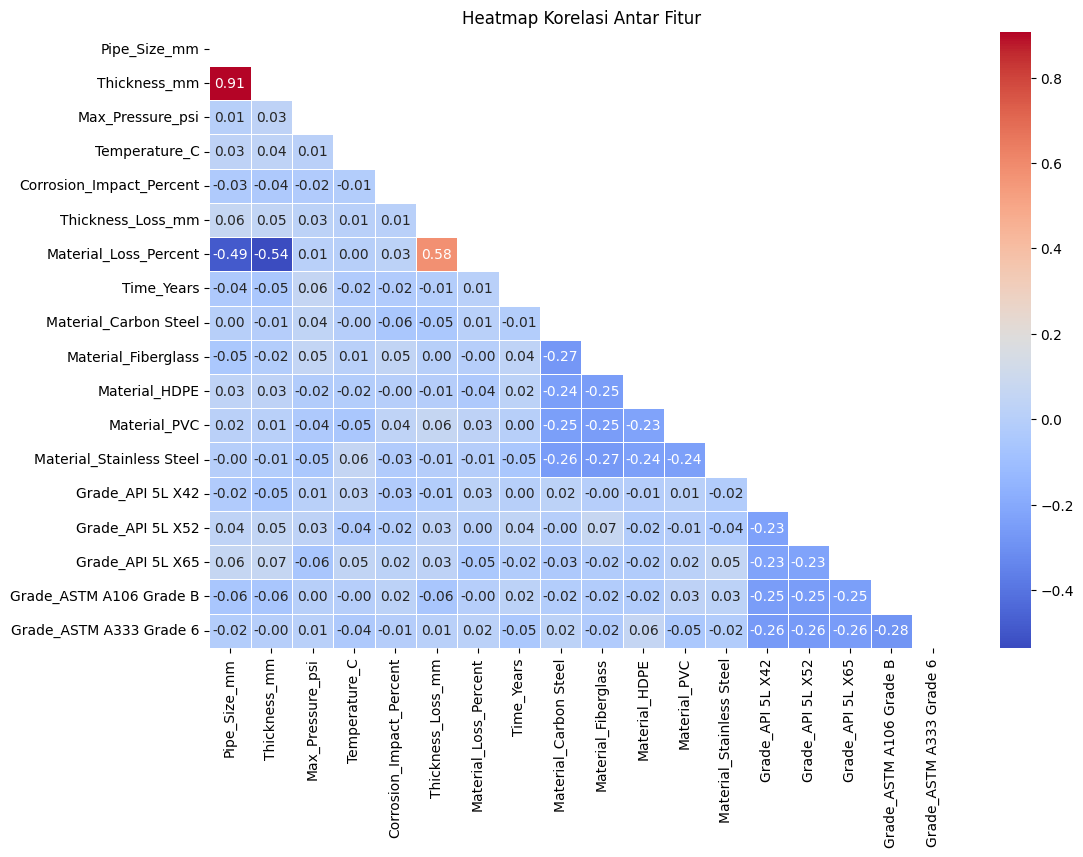

In [65]:
def plot_correlation_heatmap(feature):
    plt.figure(figsize=(12, 8))
    correlation_matrix = feature.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask)
    plt.title('Heatmap Korelasi Antar Fitur')
    plt.show()

# Tampilkan heatmap korelasi (tanpa target)
plot_correlation_heatmap(data_EDA.drop('Condition', axis=1))

Dari heatmap korelasi, keliatan banget kalau fitur `thickness_mm` dan `pipe_size_mm` itu **sangat berkorelasi tinggi** (multikolinearitas). Ini bikin redundansi atau duplikasi informasi, jadi kita bakal pilih salah satu aja. Kita pilih `thickness_mm` karena lebih relevan sama kondisi pipa. Fitur lainnya ada yang berkorelasi juga tapi masih aman.

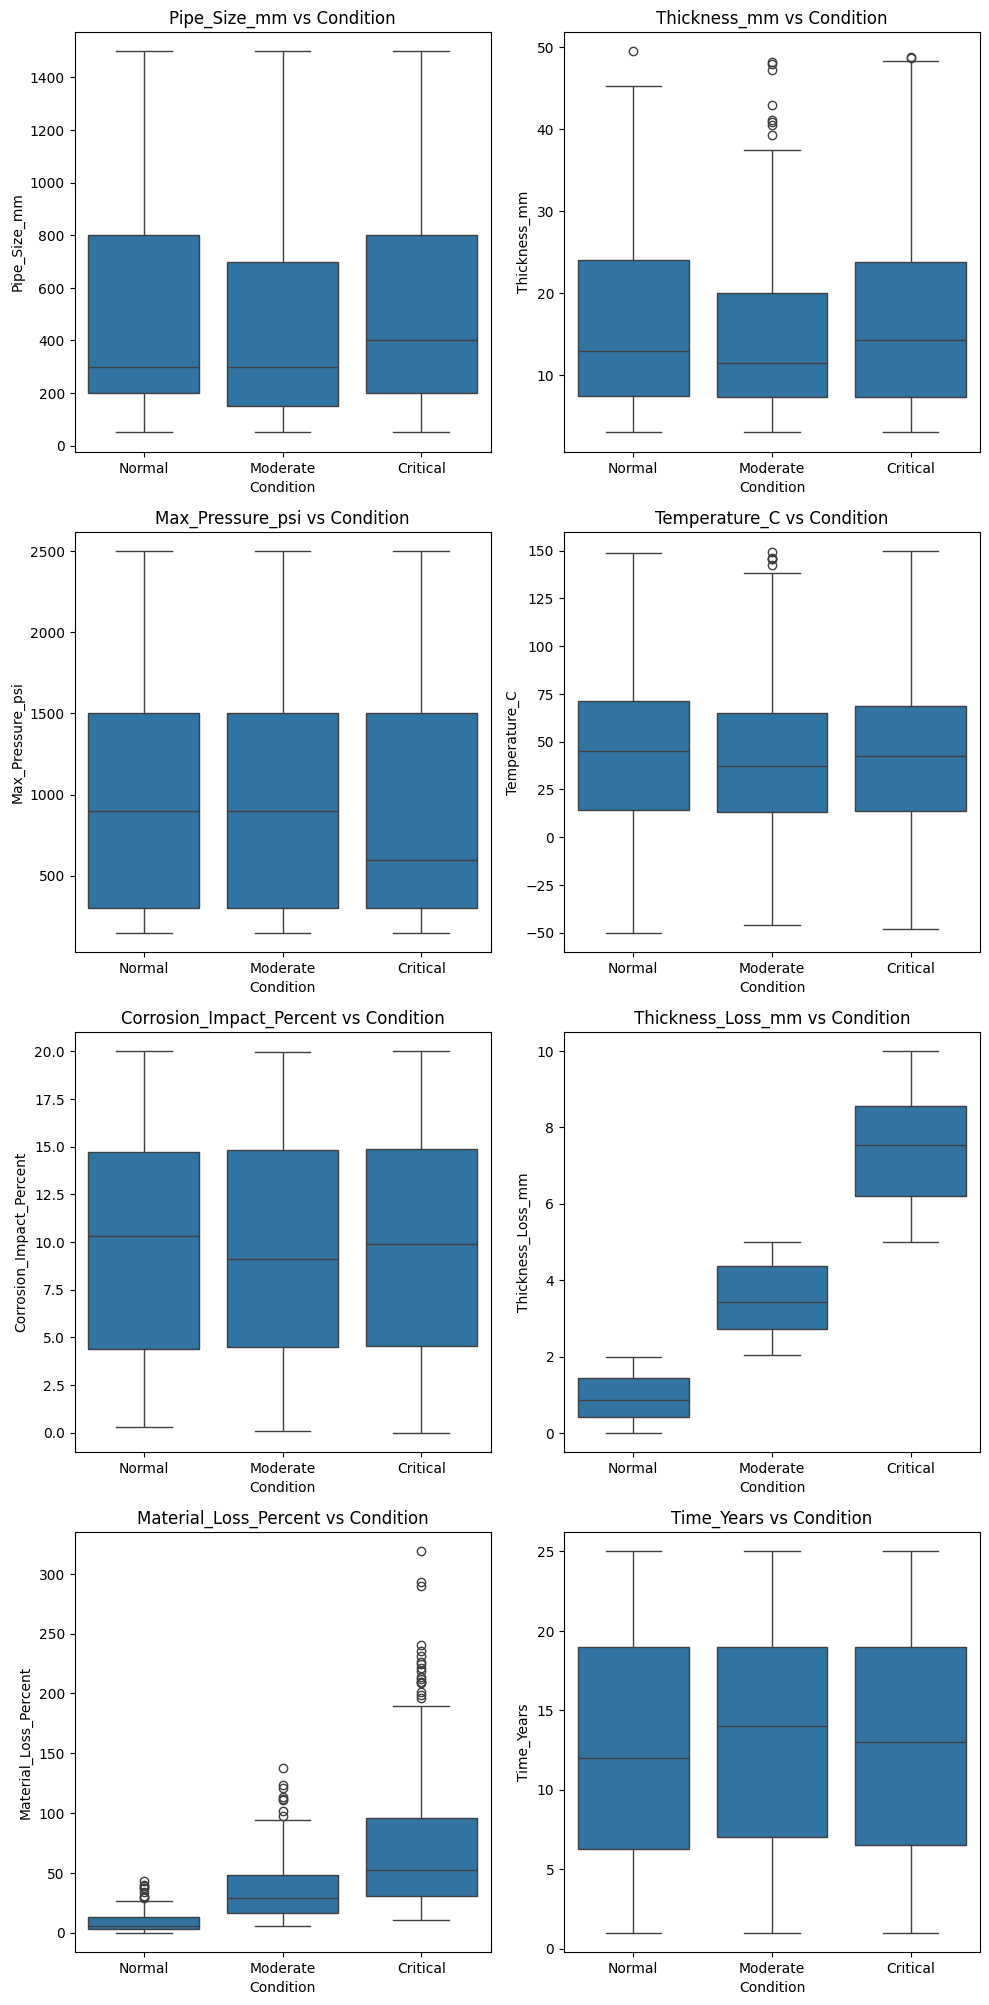

In [66]:
# Visualisasi hubungan fitur numerik dengan target
n_cols = 2
num_vars = len(num_feature)
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_feature):
    sns.boxplot(x='Condition', y=col, data=data, ax=axes[i], order=['Normal', 'Moderate', 'Critical'])
    axes[i].set_title(f'{col} vs Condition')
    axes[i].set_xlabel('Condition')
    axes[i].set_ylabel(col)

# Hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Dari visualisasi boxplot di atas, keliatan jelas kalau fitur `thickness_loss` dan `material_loss` punya perbedaan yang signifikan antar kelas Condition. Ini bagus buat model nanti!

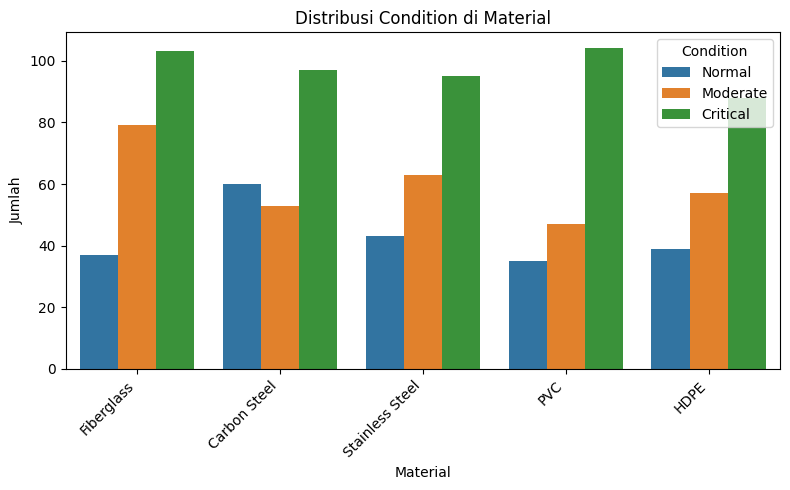

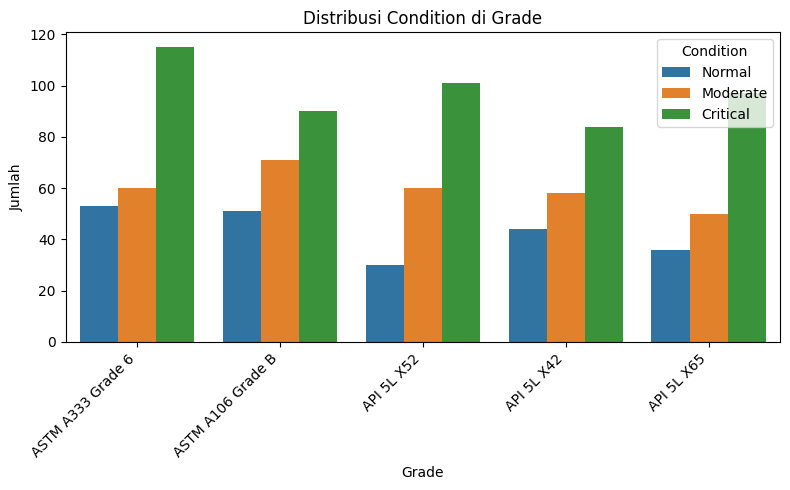

In [67]:
# Visualisasi hubungan fitur kategoris dengan target
cat_features_eda = ['Material', 'Grade']
for col in cat_features_eda:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Condition', data=data, order=data[col].value_counts().index, hue_order=['Normal', 'Moderate', 'Critical'])
    plt.title(f'Distribusi Condition di {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Dari visualisasi hubungan fitur kategoris dengan target, keliatan kalau setiap grade dan material punya pengaruh yang relatif sama terhadap kondisi - gak ada yang terlalu dominan banget.

# **5. Data Preprocessing**

Nah di bagian ini kita bakal ngerapihin data sebelum dipake buat model. Preprocessing itu penting banget supaya kualitas datanya oke dan model bisa perform dengan baik.

Kalau pake data teks atau data mentah lainnya, biasanya masih berantakan - ada nilai kosong, duplikasi, atau range nilai yang gak konsisten. Makanya kita harus bersihin dulu.

Beberapa tahapan yang bisa dilakukan (tapi gak terbatas pada ini aja ya):
1. Handle missing values (kalau ada)
2. Buang data duplikat (kalau ada)
3. Normalisasi atau standarisasi fitur
4. Deteksi dan handle outlier
5. Encoding data kategoris
6. Binning atau pengelompokan data

Sesuaiin aja sama karakteristik datanya ya!

## Drop Fitur yang Redundan

In [68]:
# Buang fitur Pipe_Size_mm karena redundan sama Thickness_mm
data = data.drop('Pipe_Size_mm', axis=1)

# Update list fitur numerik
num_feature = data.select_dtypes(include=['number'])

Alasan kita pilih `Thickness_mm` daripada `Pipe_Size_mm` karena ketebalan pipa lebih relevan buat nentuin kondisi pipanya. Ketebalan juga sifatnya dinamis - bisa berubah karena korosi atau aus.

## Transformasi Fitur

Distribusi Sebelum Transformasi:


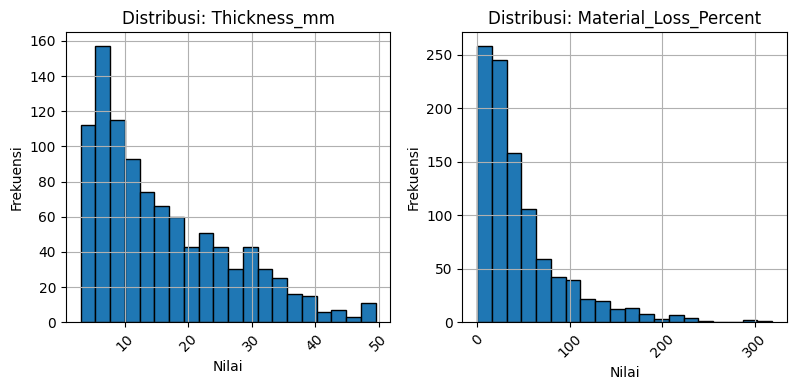


Distribusi Setelah Transformasi:


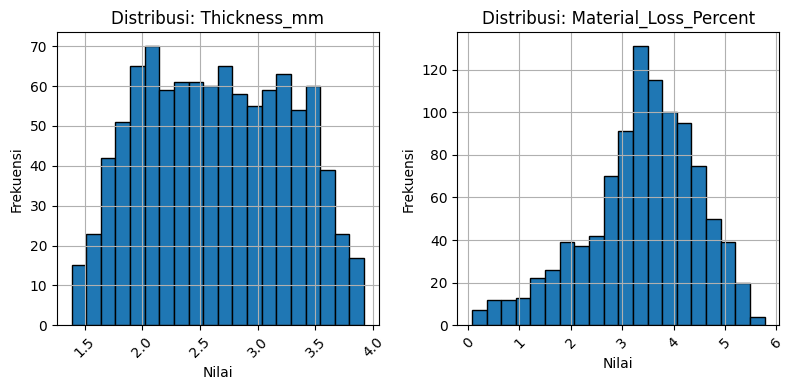


Jumlah Outlier Setelah Transformasi:
Kolom Thickness_mm: Outliers = 0, Proporsi = 0.00%
Kolom Max_Pressure_psi: Outliers = 0, Proporsi = 0.00%
Kolom Temperature_C: Outliers = 0, Proporsi = 0.00%
Kolom Corrosion_Impact_Percent: Outliers = 0, Proporsi = 0.00%
Kolom Thickness_Loss_mm: Outliers = 0, Proporsi = 0.00%
Kolom Material_Loss_Percent: Outliers = 28, Proporsi = 2.80%
Kolom Time_Years: Outliers = 0, Proporsi = 0.00%


In [69]:
def apply_transform(df, columns):
    """
    Nerapin transformasi log1p ke kolom yang distribusinya skewed
    """
    transformer = FunctionTransformer(np.log1p)
    df_transformed = df.copy()
    
    for col in columns:
        if (df_transformed[col] < -1).any():
            raise ValueError(f"Kolom {col} ada nilai < -1, gak bisa pake log1p.")
        df_transformed[col] = transformer.transform(df_transformed[[col]])
        
    return df_transformed, transformer

# Tampilkan distribusi sebelum transformasi
print("Distribusi Sebelum Transformasi:")
plot_feature_distributions(data, ['Thickness_mm', 'Material_Loss_Percent'])

# Terapkan transformasi
data, transformer = apply_transform(data, ['Thickness_mm', 'Material_Loss_Percent'])

# Tampilkan distribusi setelah transformasi
print("\nDistribusi Setelah Transformasi:")
plot_feature_distributions(data, ['Thickness_mm', 'Material_Loss_Percent'])

print("\nJumlah Outlier Setelah Transformasi:")
deteksi_outliers(data, num_feature)

Hasilnya bagus! Distribusinya udah lebih mendekati normal dan jumlah outlier juga berkurang signifikan.

## Split Data

Splitting dilakukan sebelum scaling dan encoding supaya gak ada data leakage. Jadi kita coba simulate kondisi real-world dimana model belum pernah liat data test sama sekali.

In [70]:
def data_splitting(df, target_column, test_size=0.2):
    """
    Split data dengan stratified sampling biar distribusi target tetap seimbang
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    return X_train, X_test, y_train, y_test

# Panggil fungsi splitting
X_train, X_test, y_train, y_test = data_splitting(data, 'Condition')

# Cek ukuran data hasil splitting
print(f"Ukuran data train: {X_train.shape}")
print(f"Ukuran data test: {X_test.shape}")

Ukuran data train: (800, 9)
Ukuran data test: (200, 9)


## Scaling Fitur Numerik

In [71]:
def scaling_feature(X_train, X_test):
    """
    Scaling fitur numerik pake MinMaxScaler biar range-nya jadi 0-1
    """
    scaler = MinMaxScaler()

    num_feature = X_train.select_dtypes(include=['number'])
    
    # Fit scaler di training data, transform keduanya
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train[num_feature.columns]),
        columns=num_feature.columns, 
        index=X_train.index
    )

    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test[num_feature.columns]),
        columns=num_feature.columns, 
        index=X_test.index
    )

    # Gabungin kembali sama fitur kategoris
    cat_feature = X_train.select_dtypes(include=['object'])
    X_train_scaled = pd.concat([X_train_scaled, X_train[cat_feature.columns]], axis=1)
    X_test_scaled = pd.concat([X_test_scaled, X_test[cat_feature.columns]], axis=1)

    return X_train_scaled, X_test_scaled, scaler

# Lakukan scaling
X_train, X_test, scaler = scaling_feature(X_train, X_test)

print("X_train setelah scaling:")
display(X_train.head())
print("\nX_test setelah scaling:")
display(X_test.head())

X_train setelah scaling:


,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material,Grade
502,0.173430,0.000000,0.708228,0.2915,0.132265,0.571016,0.958333,Stainless Steel,API 5L X65
465,0.438707,0.574468,0.828370,0.8965,0.080160,0.362670,0.583333,HDPE,ASTM A333 Grade 6
694,0.691555,0.000000,0.902070,0.1240,0.765531,0.623469,0.458333,PVC,ASTM A106 Grade B
401,0.911101,0.063830,0.178193,0.3390,0.312625,0.377395,0.750000,HDPE,ASTM A333 Grade 6
677,0.880941,0.063830,0.515396,0.7535,0.332665,0.399814,0.125000,PVC,ASTM A333 Grade 6



X_test setelah scaling:


,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material,Grade
550,0.654180,0.319149,0.330641,0.4785,0.107214,0.317100,0.250000,Stainless Steel,API 5L X65
998,0.547817,0.191489,0.435639,0.3300,0.539078,0.629431,0.458333,HDPE,API 5L X42
195,0.869375,0.319149,0.626956,0.0215,0.042084,0.128523,0.166667,Fiberglass,API 5L X65
865,0.689845,0.319149,0.289753,0.0815,0.128257,0.329760,0.541667,Carbon Steel,ASTM A333 Grade 6
208,0.210951,0.000000,0.338718,0.8370,0.004008,0.096964,0.166667,PVC,API 5L X42


## Encoding Fitur Kategoris

In [72]:
def onehot_encoding(X_train, X_test, categorical_cols):
    """
    One-hot encoding buat fitur kategoris
    """
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    encoders = {}

    for col in categorical_cols:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

        # Fit dan transform di training data
        col_encoded_train = encoder.fit_transform(X_train_encoded[[col]])
        col_names_raw = encoder.get_feature_names_out([col])

        # Bersihkan nama kolom hasil encoding
        col_names_cleaned = [re.sub(r'\W+', '_', name) for name in col_names_raw]

        # Transform di test data
        col_encoded_test = encoder.transform(X_test_encoded[[col]])

        # Bikin DataFrame dari hasil encoding
        col_encoded_train_df = pd.DataFrame(
            col_encoded_train, 
            columns=col_names_cleaned, 
            index=X_train_encoded.index
        )
        col_encoded_test_df = pd.DataFrame(
            col_encoded_test, 
            columns=col_names_cleaned, 
            index=X_test_encoded.index
        )

        # Gabungin dengan data yang udah ada
        X_train_encoded = pd.concat([X_train_encoded.drop(columns=[col]), col_encoded_train_df], axis=1)
        X_test_encoded = pd.concat([X_test_encoded.drop(columns=[col]), col_encoded_test_df], axis=1)

        # Simpan encoder-nya
        encoders[col] = encoder

    return X_train_encoded, X_test_encoded, encoders

# Lakukan one-hot encoding
categorical_features = ['Material', 'Grade']
X_train, X_test, onehot_encoders = onehot_encoding(X_train, X_test, categorical_features)

# Tampilkan hasil
print("X_train setelah one-hot encoding:")
display(X_train.head())
print("\nX_test setelah one-hot encoding:")
display(X_test.head())

X_train setelah one-hot encoding:



,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material_Carbon_Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless_Steel,Grade_API_5L_X42,Grade_API_5L_X52,Grade_API_5L_X65,Grade_ASTM_A106_Grade_B,Grade_ASTM_A333_Grade_6
502,0.173430,0.000000,0.708228,0.2915,0.132265,0.571016,0.958333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
465,0.438707,0.574468,0.828370,0.8965,0.080160,0.362670,0.583333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
694,0.691555,0.000000,0.902070,0.1240,0.765531,0.623469,0.458333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
401,0.911101,0.063830,0.178193,0.3390,0.312625,0.377395,0.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
677,0.880941,0.063830,0.515396,0.7535,0.332665,0.399814,0.125000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0



X_test setelah one-hot encoding:


,Thickness_mm,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Material_Carbon_Steel,Material_Fiberglass,Material_HDPE,Material_PVC,Material_Stainless_Steel,Grade_API_5L_X42,Grade_API_5L_X52,Grade_API_5L_X65,Grade_ASTM_A106_Grade_B,Grade_ASTM_A333_Grade_6
550,0.654180,0.319149,0.330641,0.4785,0.107214,0.317100,0.250000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,0.547817,0.191489,0.435639,0.3300,0.539078,0.629431,0.458333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
195,0.869375,0.319149,0.626956,0.0215,0.042084,0.128523,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
865,0.689845,0.319149,0.289753,0.0815,0.128257,0.329760,0.541667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
208,0.210951,0.000000,0.338718,0.8370,0.004008,0.096964,0.166667,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
def label_encode_target(y_train, y_test):
    """
    Label encoding buat target klasifikasi dengan urutan yang udah ditentuin
    """
    condition_order = ['Normal', 'Moderate', 'Critical']
    label_encoder = LabelEncoder()
    label_encoder.fit(condition_order)

    # Transform y_train dan y_test
    y_train_encoded = pd.Series(
        label_encoder.transform(y_train), 
        index=y_train.index, 
        name='Condition'
    )
    y_test_encoded = pd.Series(
        label_encoder.transform(y_test), 
        index=y_test.index, 
        name='Condition'
    )

    return y_train_encoded, y_test_encoded, label_encoder

# Lakukan label encoding di target
y_train, y_test, encoder = label_encode_target(y_train, y_test)

print("y_train setelah label encoding:")
display(y_train.head())
print("\ny_test setelah label encoding:")
display(y_test.head())

y_train setelah label encoding:


502    2
465    2
694    0
401    1
677    1
Name: Condition, dtype: int64


y_test setelah label encoding:


550    2
998    0
195    2
865    2
208    2
Name: Condition, dtype: int64

Oke done! Setelah scaling dan encoding, data kita sekarang punya range 0-1 dengan total 17 fitur. Data udah di-split pake stratified sampling biar distribusi target tetep balance. Siap dipake buat training! 🚀

# Simpan Hasil Preprocessing

In [74]:
# Simpan ke file CSV di folder preprocessed_data_manual
# Bikin foldernya dulu kalau belum ada
os.makedirs('preprocessed_data_manual', exist_ok=True)

X_train.to_csv('preprocessed_data_manual/X_train_preprocessed.csv', index=False)
X_test.to_csv('preprocessed_data_manual/X_test_preprocessed.csv', index=False)
y_train.to_csv('preprocessed_data_manual/y_train_preprocessed.csv', index=False)
y_test.to_csv('preprocessed_data_manual/y_test_preprocessed.csv', index=False)

print("✓ Semua file hasil preprocessing udah tersimpan!")

✓ Semua file hasil preprocessing udah tersimpan!
